# Demographics
- age
- gender
- ybocs severity
- IQ
- handedness


In [1]:
# def get_model_inputs(files):
#     # open as xarray
#     datasets = xr.open_mfdataset(files, concat_dim='dataset', combine='nested')
#     # flatten the array
#     datasets = datasets.stack(subject=('dataset', 'participant_id'))
#     # drop the padded rows
#     datasets = datasets.dropna(dim='subject', how='all')
#     return datasets

In [14]:
from src.data_loader import load_model_inputs
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

denoise = 'simple+gsr'  # has no bearing on demographics
ds_list = ["SNUH_OCD", "SNUH_HC", "CBN_OCD", "CBN_HC", "MEL_OCD_ClinicalTrial"]
# # Get model inputs
# phen_files = []
# for ds in ds_list:
#     f = '../data/model_inputs/'+ds+'_denoise-'+denoise+'.csv'
#     phen_files.append(pd.read_csv(f))

# # convert to numpy / pandas
# y_df = pd.concat(phen_files, ignore_index=True)

y_df, _ = load_model_inputs(ds_list, denoise)

In [17]:
y_df.shape

(345, 16)

In [16]:
# reorganise data and put them back into human readable if needed.
# recode to human readable
y_df['site'].replace({1:'Brisbane', 2:'Melbourne', 3:'Korea'}, inplace=True)
y_df['group'].replace({1:'OCD', 0:'Control'}, inplace=True)
y_df['gender'].replace({1:'Male', 0:'Female'}, inplace=True)
y_df['FD'] = y_df['avg_framewise_displacement']

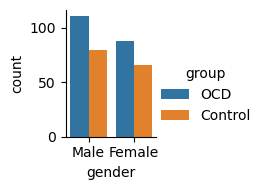

(gender      Female        Male
 group                         
 Control  65.171014   80.828986
 OCD      88.828986  110.171014,
 gender   Female   Male
 group                 
 Control    65.5   80.5
 OCD        88.5  110.5,
                  test    lambda      chi2  dof      pval    cramer     power
 0             pearson  1.000000  0.005201  1.0  0.942510  0.003883  0.050596
 1        cressie-read  0.666667  0.005200  1.0  0.942511  0.003882  0.050596
 2      log-likelihood  0.000000  0.005200  1.0  0.942513  0.003882  0.050596
 3       freeman-tukey -0.500000  0.005200  1.0  0.942514  0.003882  0.050596
 4  mod-log-likelihood -1.000000  0.005200  1.0  0.942515  0.003882  0.050596
 5              neyman -2.000000  0.005199  1.0  0.942517  0.003882  0.050596)

In [4]:
import pingouin as pg

# count plots (N, handedness, gender)
sns.catplot(kind='count', data=y_df, x='gender', hue='group', height=2, sharey=False)
sns.despine()
plt.show()

# chi square tests
display(pg.chi2_independence(y_df, x='group',y='gender'))

In [5]:
y_df.group.unique()

array(['OCD', 'Control'], dtype=object)

/tmp/ipykernel_3292236/1047692790.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['id'] = df.index


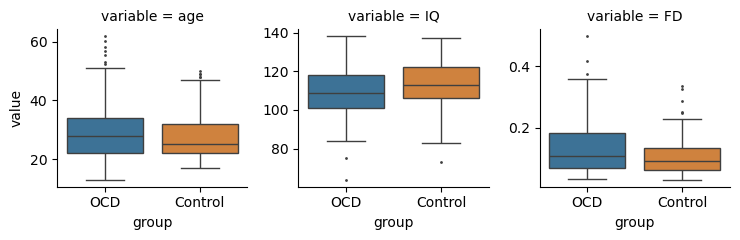

age


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.080776,337.233511,two-sided,0.038209,"[-3.92, -0.11]",0.220598,0.951,0.523465


IQ


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.907114,318.89954,two-sided,0.003903,"[1.26, 6.53]",0.316312,6.705,0.821754


FD


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-4.090847,336.626623,two-sided,0.000054,"[-0.05, -0.02]",0.417483,318.682,0.96859


In [6]:
df = y_df[['site', 'group', 'age', 'IQ', 'FD']]
df.reset_index(inplace=True)
df['id'] = df.index

df = pd.melt(df, id_vars=['id', 'site', 'group'], value_vars=['age', 'IQ', 'FD'])
sns.catplot(data=df, kind='box', x='group', y='value', hue='group', col='variable', sharey=False, fliersize=1, saturation=0.6, linewidth=1, height=2.5)
plt.show()

# between group stats
for variable in ['age', 'IQ', 'FD']:
    print(variable)
    a = y_df.loc[y_df.group == 'Control'][variable].values
    b = y_df.loc[y_df.group == 'OCD'][variable].values
    display(pg.ttest(a, b))

/home/lukeh/miniconda3/envs/MetaMatch/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


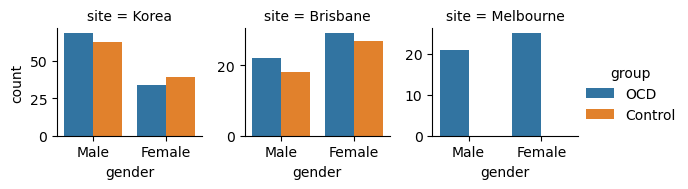

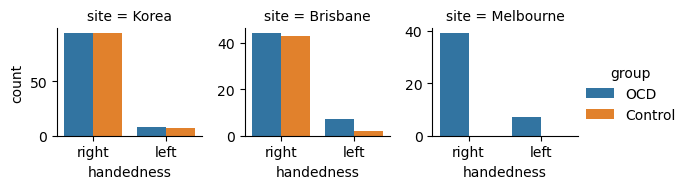

In [7]:
# count plots (N, handedness, gender)
for variable in ['gender', 'handedness']:
    sns.catplot(kind='count', data=y_df, x=variable, hue='group', col='site', height=2, sharey=False)
    sns.despine()
    plt.show()



/tmp/ipykernel_3292236/4211586795.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['id'] = df.index


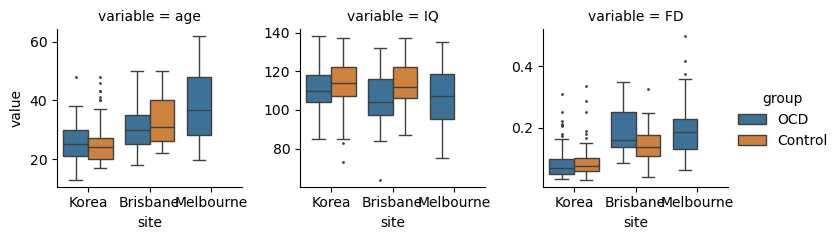

In [8]:
df = y_df[['site', 'group', 'age', 'IQ', 'FD']]
df.reset_index(inplace=True)
df['id'] = df.index

df = pd.melt(df, id_vars=['id', 'site', 'group'], value_vars=['age', 'IQ', 'FD'])
sns.catplot(data=df, kind='box', x='site', y='value', hue='group', col='variable', sharey=False, fliersize=1, saturation=0.6, linewidth=1, height=2.5)
plt.show()


/tmp/ipykernel_3292236/1761270626.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['id'] = df.index


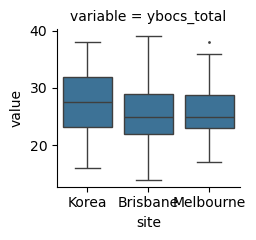

In [9]:
df = y_df[['site', 'group', 'ybocs_total']]
df.reset_index(inplace=True)
df['id'] = df.index
df = df.loc[df.group == 'OCD']

df = pd.melt(df, id_vars=['id', 'site'], value_vars=['ybocs_total'])
sns.catplot(data=df, kind='box', x='site', y='value', col='variable', sharey=False, fliersize=1, saturation=0.6, linewidth=1, height=2.5)
plt.show()

# Table

In [28]:
# Create a pandas dataframe with demographic information
# to be presented in the manuscript
import numpy as np

table_df = pd.DataFrame(columns=['Measure',
                                 'Brisbane: Control', 'Brisbane: OCD',
                                 'Korea: Control','Korea: OCD',
                                 'Melbourne: Control', 'Melbourne: OCD',
                                 'Total: Control', 'Total: OCD', 'Total'])

# Row titles
table_df.loc[0, 'Measure'] = 'N'
table_df.loc[1, 'Measure'] = 'Age (years)'
table_df.loc[2, 'Measure'] = '\tMedian (IQR)'
table_df.loc[3, 'Measure'] = 'Gender'
table_df.loc[4, 'Measure'] = '\tFemale'
table_df.loc[5, 'Measure'] = '\tMale'
table_df.loc[6, 'Measure'] = 'Handedness'
table_df.loc[7, 'Measure'] = '\tLeft'
table_df.loc[8, 'Measure'] = '\tRight'
table_df.loc[9, 'Measure'] = 'Years of education'
table_df.loc[10, 'Measure'] = '\tMedian (IQR)'
table_df.loc[11, 'Measure'] = 'IQ'
table_df.loc[12, 'Measure'] = '\tMedian (IQR)'
table_df.loc[13, 'Measure'] = 'Framewise displacement (mm)'
table_df.loc[14, 'Measure'] = '\tMedian (IQR)'
table_df.loc[15, 'Measure'] = 'Y-BOCS'
table_df.loc[16, 'Measure'] = '\tMedian (IQR)'
table_df.loc[17, 'Measure'] = 'HAM-A'
table_df.loc[18, 'Measure'] = '\tMedian (IQR)'
table_df.loc[19, 'Measure'] = 'HAM-D'
table_df.loc[20, 'Measure'] = '\tMedian (IQR)'
table_df.loc[21, 'Measure'] = 'MADRS'
table_df.loc[22, 'Measure'] = '\tMedian (IQR)'


# Data
# N
for site in sorted(y_df.site.unique()):
    for group in sorted(y_df.group.unique()):
        data = y_df.loc[(y_df.site == site) & (y_df.group == group)]
        value = data.participant_id.count()
        col = site+': '+group
        table_df.loc[0, col] = value
        
for group in sorted(y_df.group.unique()):
    table_df.loc[0, 'Total: '+ group] = (table_df.loc[0, 'Brisbane: '+ group]
                                        + table_df.loc[0, 'Korea: '+ group]
                                        + table_df.loc[0, 'Melbourne: '+ group])
table_df.loc[0, 'Total'] = table_df.loc[0, 'Total: Control'] + table_df.loc[0, 'Total: OCD']

# Continuous variables
indicies = [2, 12, 14, 16, 18, 20, 22, 10]
labels = ['age', 'IQ', 'avg_framewise_displacement', 'ybocs_total',
          'hama_total', 'hamd_total', 'madrs_total', 'years_of_education']
for i, measure in zip(indicies, labels):
    for site in sorted(y_df.site.unique()):
        for group in sorted(y_df.group.unique()):
            data = y_df.loc[(y_df.site == site) & (y_df.group == group)]
            median = np.round(data[measure].median(), 2)
            quantile_low = np.round(data[measure].quantile(0.25), 2)
            quantile_high = np.round(data[measure].quantile(0.75), 2)
            value_string = f"{median} ({quantile_low} - {quantile_high})"
            col = site+': '+group
            table_df.loc[i, col] = value_string


    for group in sorted(y_df.group.unique()):
        data = y_df.loc[(y_df.group == group)]
        median = np.round(data[measure].median(), 2)
        quantile_low = np.round(data[measure].quantile(0.25), 2)
        quantile_high = np.round(data[measure].quantile(0.75), 2)
        value_string = f"{median} ({quantile_low} - {quantile_high})"
        col = 'Total: '+ group
        table_df.loc[i, col] = value_string

    data = y_df.copy()
    median = np.round(data[measure].median(), 2)
    quantile_low = np.round(data[measure].quantile(0.25), 2)
    quantile_high = np.round(data[measure].quantile(0.75), 2)
    value_string = f"{median} ({quantile_low} - {quantile_high})"
    col = 'Total'
    table_df.loc[i, col] = value_string
    # if measure == 'avg_framewise_displacement':
    #     raise SystemExit("Stop right there!")


# Categorical variables
indicies = [4, 7]
labels = ['gender', 'handedness']
for i, measure in zip(indicies, labels):
    for site in sorted(y_df.site.unique()):
        for group in sorted(y_df.group.unique()):
            col = site+': '+group
            data = y_df.loc[(y_df.site == site) & (y_df.group == group)]
            for j, (sub_label, value) in enumerate(sorted(data.groupby([measure]).participant_id.count().items())):
                #print(sub_label, value)  # confirm it is in alphabetical & the same as the table...
                percentage = np.round((value / table_df[col][0]) * 100, 2)
                value_string = f"{value} ({percentage}%)"
                table_df.loc[i+j, col] = value_string

    for group in sorted(y_df.group.unique()):
        col = 'Total: '+group
        data = y_df.loc[(y_df.group == group)]
        for j, (sub_label, value) in enumerate(sorted(data.groupby([measure]).participant_id.count().items())):
            percentage = np.round((value / table_df[col][0]) * 100, 2)
            value_string = f"{value} ({percentage}%)"
            table_df.loc[i+j, col] = value_string

    col = 'Total'
    data = y_df.copy()
    for j, (sub_label, value) in enumerate(sorted(data.groupby([measure]).participant_id.count().items())):
        percentage = np.round((value / table_df[col][0]) * 100, 2)
        value_string = f"{value} ({percentage}%)"
        table_df.loc[i+j, col] = value_string
table_df.drop('Melbourne: Control', axis='columns', inplace=True)
table_df

,Measure,Brisbane: Control,Brisbane: OCD,Korea: Control,Korea: OCD,Melbourne: OCD,Total: Control,Total: OCD,Total
0,N,45,51,101,102,46,146,199,345
1,Age (years),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,\tMedian (IQR),31.0 (26.0 - 40.0),30.0 (25.0 - 35.0),24.0 (20.0 - 27.0),25.0 (21.0 - 29.75),36.67 (28.04 - 47.97),25.0 (22.0 - 32.0),28.0 (22.0 - 34.0),27.0 (22.0 - 33.0)
3,Gender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,\tFemale,27 (60.0%),29 (56.86%),39 (38.61%),34 (33.33%),25 (54.35%),66 (45.21%),88 (44.22%),154 (44.64%)
5,\tMale,18 (40.0%),22 (43.14%),62 (61.39%),68 (66.67%),21 (45.65%),80 (54.79%),111 (55.78%),191 (55.36%)
6,Handedness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,\tLeft,2 (4.44%),7 (13.73%),7 (6.93%),8 (7.84%),7 (15.22%),9 (6.16%),22 (11.06%),31 (8.99%)
8,\tRight,43 (95.56%),44 (86.27%),94 (93.07%),94 (92.16%),39 (84.78%),137 (93.84%),177 (88.94%),314 (91.01%)
9,Years of education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
import docx 
from docx.enum.section import WD_ORIENT

# Create an instance of a word document 
doc = docx.Document()

# Add a Title to the document 
doc.add_heading('Table 1. Population characteristics', 0) 
  
# Creating a table object 
table = doc.add_table(table_df.shape[0]+1, table_df.shape[1])

# add the header rows.
for j in range(table_df.shape[-1]):
    table.cell(0,j).text = table_df.columns[j]

# add the rest of the data frame
for i in range(table_df.shape[0]):
    for j in range(table_df.shape[-1]):
        if str(table_df.values[i,j]) == 'nan':
            pass
        else:
            table.cell(i+1,j).text = str(table_df.values[i,j])

# save the doc
doc.save('../results/figures/demographics.docx')